# Contents
- Problem definition
- Basic use of library
- Graph types
    * Directed & Undirected Graphs
- Degrees
    * In Degree
    * Out Degree
    * Degree
- Centrality
    - Closeness
    - Betweenness
    - Eigen Value
- Bridges & Centrality Example
- Degree & Centrality Example
- References

In [1]:
import networkx as nx
import sys
import matplotlib.pyplot as plt
print(f'Python version : {sys.version}')

Python version : 3.6.10 |Anaconda, Inc.| (default, Mar 23 2020, 17:58:33) [MSC v.1916 64 bit (AMD64)]


##### Basic operations in Undirected Graph 

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000

The shortest path between b and d: ['b', 'c', 'd']
The shortest path between b and d (Considering weight): ['b', 'a', 'c', 'd']


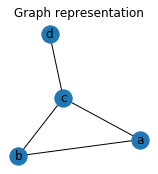

In [2]:
g = nx.Graph() #undirected Graph
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2)

print(nx.info(g)+'\n')
plt.figure(figsize =(2,2))
nx.draw(g,with_labels=True)
plt.title('Graph representation')
print(f'The shortest path between b and d: {nx.shortest_path(g, "b", "d")}')
print(f'The shortest path between b and d (Considering weight): {nx.shortest_path(g, "b", "d", weight="weight")}')

In [3]:
g = nx.Graph() #undirected Graph
# One node at a time
g.add_node(1)
# A list of nodes
g.add_nodes_from([2, 3])
# A container of nodes
h = nx.path_graph(5)
g.add_nodes_from(h)

print(f'Here are the nodes: {g.nodes()}')

Here are the nodes: [1, 2, 3, 0, 4]


##### You can also remove any node of the graph.

In [4]:
g.remove_node(3)
print(f'Here are the nodes: {g.nodes()}')

Here are the nodes: [1, 2, 0, 4]


##### Edges can be added in many ways.

In [5]:
#A node can be any hashable object.
g.add_edge(1, 2)

e = (3, 2) #e = (2, 3) are the same thing as above.
g.add_edge(*e) # unpack tuple
print(f'Here are the edges: {g.edges()}')
print('e=(2,3) and e=(3,2) is the same thing because graph is undirected.')

#Adding list of edges
g.add_edges_from([(1, 2), (1, 3)])

# A container of edges
g.add_edges_from(h.edges())

print(f'Here are the edges: {g.edges()}')

Here are the edges: [(1, 2), (2, 3)]
e=(2,3) and e=(3,2) is the same thing because graph is undirected.
Here are the edges: [(1, 2), (1, 3), (1, 0), (2, 3), (4, 3)]


##### You can also remove any edge you desire.

In [6]:
g.remove_edge(1, 2)
print(f'Here are the edges: {g.edges()}')

Here are the edges: [(1, 3), (1, 0), (2, 3), (4, 3)]


##### Basic properties are as follows:

In [7]:
print(f'Number of nodes: {g.number_of_nodes()}') # also g.order()
print(f'Number of edges: {g.number_of_edges()}') # also g.size()
print(f'Number of edges adjacent to node 1: {g.degree(1)}')
print(f'Return a list of the nodes connected to node 1: {list(g.neighbors(1))}')
print(f'The neighbors of the node 1: {list(g.neighbors(1))}')

Number of nodes: 5
Number of edges: 4
Number of edges adjacent to node 1: 2
Return a list of the nodes connected to node 1: [3, 0]
The neighbors of the node 1: [3, 0]


##### NetworkX Graph has the form of  'Dictionary of dictionary of dict.... '. 
##### This representation provides quick access and quick search, so that improves performance.
##### Degree is the number of edges that are incident to the vertex.

In [8]:
g.add_edge(1, 3, weight=2.5)
g.add_edge(1, 2, weight=3.5)
for node in g.nodes(): # or node in g.nodes_iter():
    print(f'Node label: {node}, Node degree: {g.degree(node)}')
for nodeS, nodeF, attr in g.edges(data=True): # unpacking
    print (nodeS, nodeF, attr)

Node label: 1, Node degree: 3
Node label: 2, Node degree: 2
Node label: 0, Node degree: 1
Node label: 4, Node degree: 1
Node label: 3, Node degree: 3
1 3 {'weight': 2.5}
1 0 {}
1 2 {'weight': 3.5}
2 3 {}
4 3 {}


Text(0.5, 1.0, 'Undirected Graph Representation')

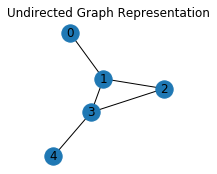

In [9]:
plt.figure(figsize =(2,2))
nx.draw(g,with_labels=True)
plt.title('Undirected Graph Representation')

##### In dictionary, you may access keys and/or items by using these:

In [10]:
fruit_dict= {'apple': 1, 'orange': [0.12, 0.02], 42: True}
fruit_dict.keys()#The keys of that dictionary.
fruit_dict.items() #The items of that dictionary.

dict_items([('apple', 1), ('orange', [0.12, 0.02]), (42, True)])

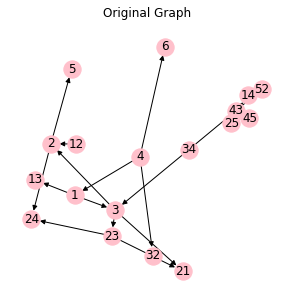

In [11]:
dg = nx.read_edgelist('directedEx.txt',create_using = nx.DiGraph(),nodetype=int)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Original Graph')
nx.draw_networkx(dg, with_label = True, node_color ='pink',node_size =300) 

##### Some algorthms are well defined only for undirected graphs. If you want to threat a graph as undirected graph for measurement, then use Graph.to_undirected()
##### Using multigraph adds flexibility but may reduce performance a little.

### Basic properties of graphs

In [12]:
g = nx.Graph()
for i in [4,7,3,1,5,8,19]:
    g.add_node(i)
g.nodes()

NodeView((4, 7, 3, 1, 5, 8, 19))

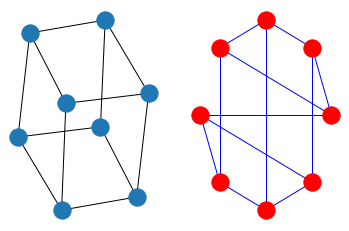

In [13]:
G = nx.cubical_graph()
plt.subplot(121)
nx.draw(G)   # default spring_layout
plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

{'A': {'B': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}}}


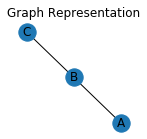

In [14]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
print(G.adj)
plt.figure(figsize=(2,2))
plt.title('Graph Representation')
nx.draw(G,with_labels=True) 

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 3
Average degree:   1.2000


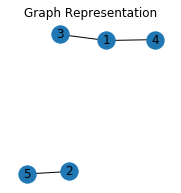

In [15]:
g=nx.Graph()
g.add_node(2)
g.add_node(5)
g.add_edge(2,5)
g.add_edge(4,1)
g.add_edges_from([(2,5),(1,3)])
print(nx.info(g))
plt.figure(figsize=(3,3))
plt.title('Graph Representation')
nx.draw(g,with_labels=True)

In [16]:
nx.write_edgelist(g,'edgeList.txt')#This writes the edges in a txt format.

### If you want to create a graph with prerecorded edges, use the code below.

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 19
Average degree:   2.1111


Text(0.5, 1.0, 'Draw the graph G with a spectral layout')

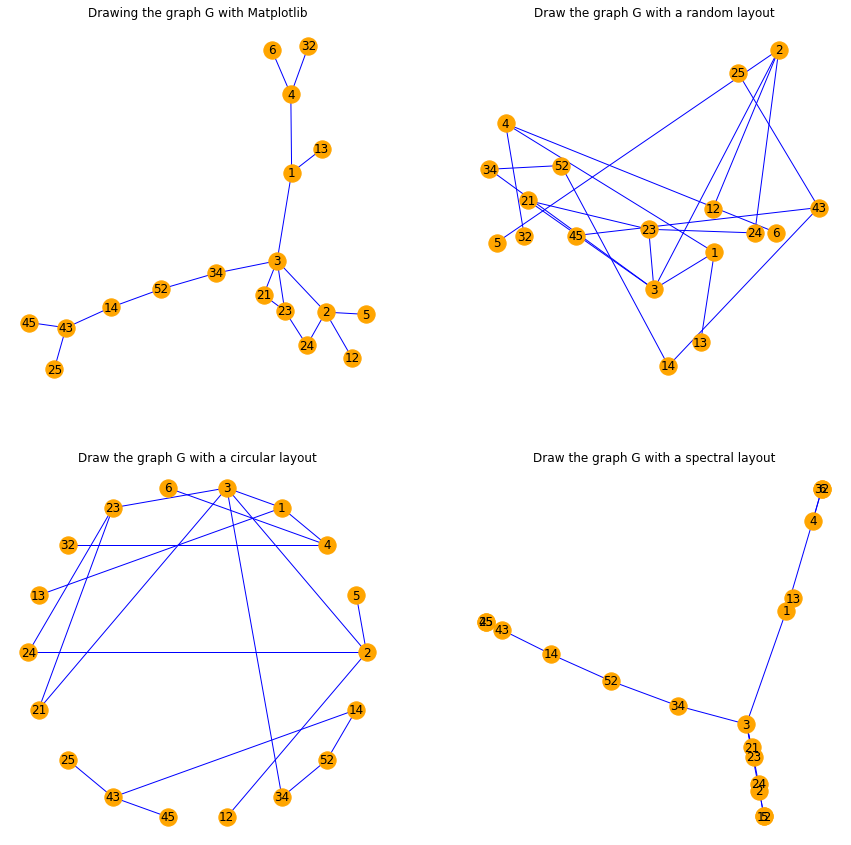

In [17]:
ng = nx.read_edgelist('readEdgeList.txt',create_using = nx.Graph(),nodetype=int)

print(nx.info(ng))

plt.figure(figsize =(15,15)) 
plt.subplot(221)
plt.axis('off')
plt.title('Drawing the graph G with Matplotlib')
nx.draw(ng,with_labels =True,node_color='orange', edge_color='b')
plt.subplot(222)
nx.draw_random(ng,with_labels =True,node_color='orange', edge_color='b')
plt.title('Draw the graph G with a random layout')
plt.subplot(223)
nx.draw_circular(ng,with_labels =True,node_color='orange', edge_color='b')
plt.title('Draw the graph G with a circular layout')
plt.subplot(224)
nx.draw_spectral(ng,with_labels =True,node_color='orange', edge_color='b')
plt.title('Draw the graph G with a spectral layout')

# Centerality
#### Why does Centerality important?
- It helps us identifying :
    - Influential nodes in Social Network.
    - Hubs in transportation Network.
    - Nodes that prevent the Network from breaking up.
    
(Centrality values are normalized.)

##### Closeness Centrality

(This is based on the assumption that important nodes are close to other nodes.)
- Closeness  centrality of a node is the reciprocal of the average shortest path distance to over all  n-1 reachable nodes.
- It computes incoming distance. For outward distance, use graph.reverse().

- Higher values of closeness represents higher centrality.

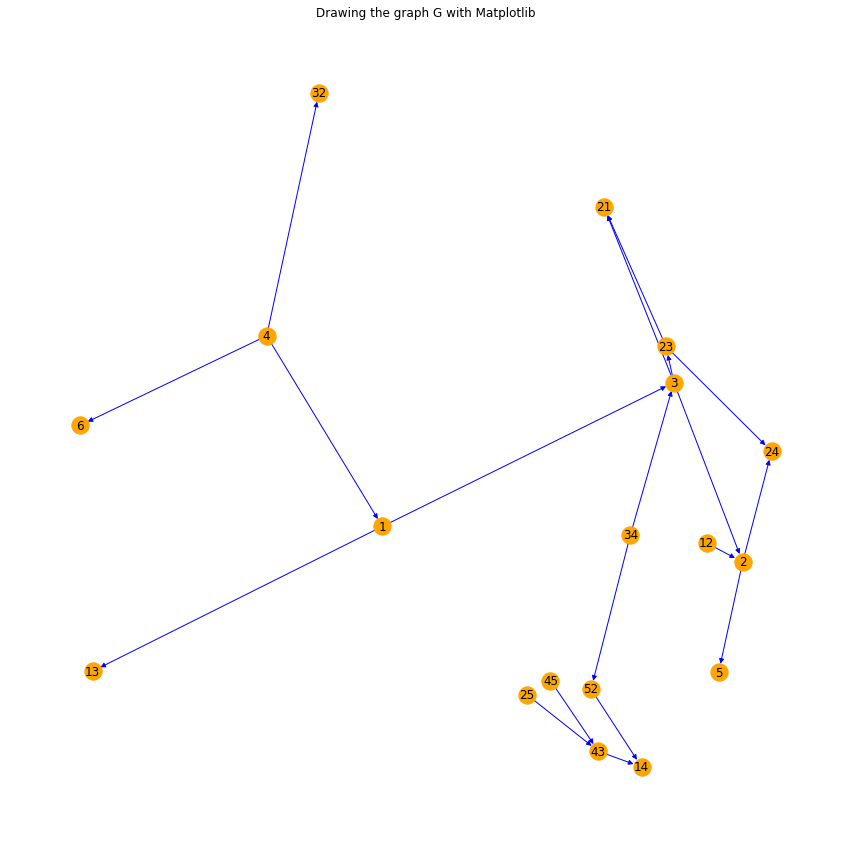

In [18]:
plt.figure(figsize =(15,15)) 
plt.axis('off')
plt.title('Drawing the graph G with Matplotlib')
nx.draw(dg,with_labels =True,node_color='orange', edge_color='b')

In [19]:
centr = dict(nx.closeness_centrality(dg))
print(f'The closeness centrality: {max(centr.values())}')
print('Node 14 has the highest value.')
centr

The closeness centrality: 0.18382352941176472
Node 14 has the highest value.


{2: 0.16339869281045752,
 5: 0.14117647058823532,
 4: 0.0,
 1: 0.058823529411764705,
 3: 0.1323529411764706,
 6: 0.058823529411764705,
 23: 0.11764705882352941,
 32: 0.058823529411764705,
 13: 0.0784313725490196,
 24: 0.1801470588235294,
 21: 0.16339869281045752,
 25: 0.0,
 43: 0.11764705882352941,
 45: 0.0,
 12: 0.0,
 34: 0.0,
 52: 0.058823529411764705,
 14: 0.18382352941176472}

##### Incremental Closeness Centrality

When adding an edge (u, v), we compute the shortest path lengths from all other nodes to u and to v before the node is added. When removing an edge, we compute the shortest path lengths after the edge is removed.
- This works only for undirected, unweighted graphs
- Results are normalized

##### Eigenvector Centrality

- Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.
- A*x = 𝜆*x (A: Adjacency Matrix, 𝜆: Eigen Value
- Numeric Algorithm
- The power iteration method is used to compute the eigenvector and convergence is not guaranteed.
- For directed graphs this is “left” eigenvector centrality which corresponds to the in-edges in the graph.  For out-edges eigenvector centrality first reverse the graph with G.reverse().


Takes the input of max_iter, error_tolerance, initial_value, weight

* A high eigenvector score means that a node is connected to many nodes who themselves have high scores.
- Eigenvector centrality is a measure of the influence of a node in a network.

Example application: Google's PageRank
#### nx.eigenvector_centrality()
There is a unique solution 𝑥, all of whose entries are positive, if 𝜆 is the largest eigenvalue of the adjacency matrix 𝐴(2).
- Takes the input of max_iter, error_tolerance, initial_value, weight, graph

#### nx.eigenvector_centrality_numpy()
There is a unique and positive solution if 𝜆 is the largest eigenvalue  associated with the eigenvector of the adjacency matrix𝐴(2).
- Takes the input of max_iter, error_tolerance, weight, graph
For directed graphs, it gives the result of in-edges.
For out-edges, first G.reverse() should be written.

#### nx.katz_centrality()
Katz centrality computes the centrality for a node based on the centrality of its neighbors.
- Takes the input of graph,alpha(attenuation constant), beta, max_iter, error_tolerance, initial_value, weight, normalized

#### nx.katz_centrality_numpy()

The parameteralphashould be strictlyless  than  the  inverse  of  largest  eigenvalue  of  the  adjacency  matrix  for  there  to  be  a  solution. 
- Takes the input of graph,alpha(attenuation constant), beta, normalized, weight
- In directed graphs, it gives“left” eigenvectors which corresponds to the in-edges in the graph. For out-edges use G.reverse() beforehand. 

In [20]:
max_iter =5000
centrality = nx.eigenvector_centrality(dg,max_iter)
centrality_numpy = nx.eigenvector_centrality_numpy(dg,max_iter)

centrality

{2: 0.0029440619224843354,
 5: 0.4077605188514882,
 4: 1.0277010296566972e-10,
 1: 5.71401772489123e-08,
 3: 1.5913539363822077e-05,
 6: 5.71401772489123e-08,
 23: 0.002944004885077188,
 32: 5.71401772489123e-08,
 13: 1.585650195667614e-05,
 24: 0.815505238238426,
 21: 0.41068872427201547,
 25: 1.0277010296566972e-10,
 43: 1.1417758439485893e-07,
 45: 1.0277010296566972e-10,
 12: 1.0277010296566972e-10,
 34: 1.0277010296566972e-10,
 52: 5.71401772489123e-08,
 14: 4.751226292267655e-05}

In [21]:
centrality_numpy

{2: 0.00020646819478394954,
 5: 0.40821388140914167,
 4: 2.656867935064543e-14,
 1: 5.285824093875587e-11,
 3: 1.044283690441081e-07,
 6: 5.285247578910874e-11,
 23: 0.00020646816751304604,
 32: 5.282645009933312e-11,
 13: 1.0450739903897105e-07,
 24: 0.8164277089006486,
 21: 0.40842029565856436,
 25: -4.5563326106264194e-14,
 43: -3.465323153720612e-11,
 45: 2.809761099407114e-14,
 12: 1.3764822906434191e-14,
 34: -3.99608042895039e-14,
 52: -7.901184848427801e-11,
 14: -2.2472981051402186e-07}

#### As can be seen above, the results are different but they are also correlated.

## DIRECTED GRAPHS
### nx.in_degree & nx.out_degree & nx.degree() Examples:
##### in_degree => Can be used in directed graphs. The number of arrows coming through the node is called in_degree
##### out_degree => Can be used in directed graphs. The number of arrows coming from the node is called out_degree
##### degree is the sum of in_degree and out_degree
#### Degree centrality starts with an assumption of : 'Important nodes have many connections.' Ex: NY Metro Station

The OUT DEGREE of the node 1 : 2
The IN DEGREE of the node 1  : 1
The TOTAL DEGREE of node 1   : 3
The IN DEGREE of the node 13 : 1

Max value of in_degree_centrality: 0.11764705882352941

The IN DEGREE centrality: {2: 0.11764705882352941, 5: 0.058823529411764705, 4: 0.0, 1: 0.058823529411764705, 3: 0.11764705882352941, 6: 0.058823529411764705, 23: 0.058823529411764705, 32: 0.058823529411764705, 13: 0.058823529411764705, 24: 0.11764705882352941, 21: 0.11764705882352941, 25: 0.0, 43: 0.11764705882352941, 45: 0.0, 12: 0.0, 34: 0.0, 52: 0.058823529411764705, 14: 0.11764705882352941}

Max value of out_degree_centrality: 0.1764705882352941

The OUT DEGREE centrality: {2: 0.11764705882352941, 5: 0.0, 4: 0.1764705882352941, 1: 0.11764705882352941, 3: 0.1764705882352941, 6: 0.0, 23: 0.11764705882352941, 32: 0.0, 13: 0.0, 24: 0.0, 21: 0.0, 25: 0.058823529411764705, 43: 0.058823529411764705, 45: 0.058823529411764705, 12: 0.058823529411764705, 34: 0.11764705882352941, 52: 0.058823529411764705, 14

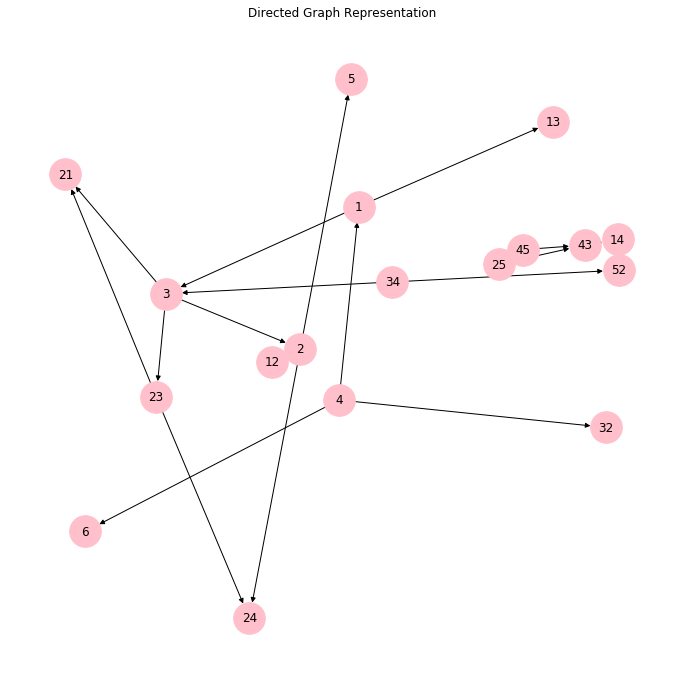

In [22]:
plt.figure(figsize=((12,12))) 
plt.axis('off')
plt.title('Directed Graph Representation')
nx.draw_networkx(dg, with_label = True, node_color ='pink',node_size =1000) 
print(f'The OUT DEGREE of the node 1 : {dg.out_degree(1, weight="weight")}')
print(f'The IN DEGREE of the node 1  : {dg.in_degree(1, weight="weight")}')
print(f'The TOTAL DEGREE of node 1   : {dg.degree(1, weight="weight")}')#This is the sum of in and out degree.
print(f'The IN DEGREE of the node 13 : {dg.in_degree(13, weight="weight")}')

print(f'\nMax value of in_degree_centrality: {max(dict(nx.in_degree_centrality(dg)).values())}')
print(f'\nThe IN DEGREE centrality: {dict(nx.in_degree_centrality(dg))}')

print(f'\nMax value of out_degree_centrality: {max(dict(nx.out_degree_centrality(dg)).values())}')
print(f'\nThe OUT DEGREE centrality: {dict(nx.out_degree_centrality(dg))}')


##### In above, 3 is the center of out degree.
##### 3 is also one of the in degree center.
##### nx.successors() is the same function neighbours, but in Directed Graphs.

In [23]:
print(f'Successors: {list(dg.successors(1))}')
print(f'Predecessors: {list(dg.predecessors(1))}')

Successors: [3, 13]
Predecessors: [4]


# Bridges

In [24]:
ex3 = nx.read_edgelist('deg.txt',create_using = nx.Graph(),nodetype=int)
print(nx.info(ex3))

if nx.has_bridges(ex3):
    the_bridges = nx.bridges(ex3)
print(f'The bridges: {list(the_bridges)}')

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 9
Average degree:   2.2500
The bridges: [(3, 4), (4, 5)]


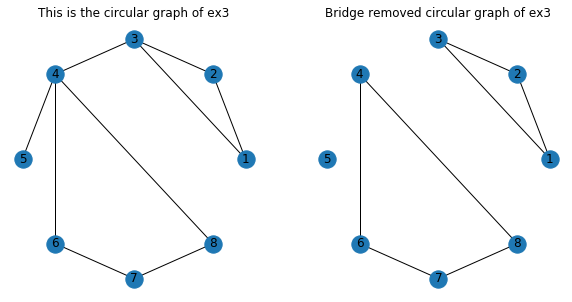

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('This is the circular graph of ex3')
nx.draw_circular(ex3,with_labels =True)
plt.subplot(122)
ex3.remove_edges_from(list(nx.bridges(ex3)))
plt.title('Bridge removed circular graph of ex3')
nx.draw_circular(ex3,with_labels =True)

##### A local bridge is an edge whose endpoints have no common neighbors. That is, the edge is not part of a triangle in the graph.

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 91
Average degree:   9.1000
Does the graph has bridges :True
The list of bridges in that graph : [(9, 10)]


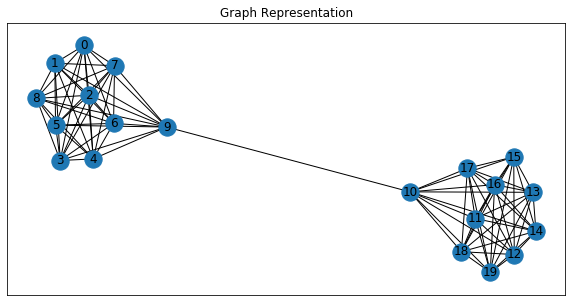

In [26]:
G = nx.barbell_graph(10, 0)
plt.figure(figsize=(10,5))
plt.title('Graph Representation')
nx.draw_networkx(G)
print(nx.info(G))
print(f'Does the graph has bridges :{nx.has_bridges(G)}')
print(f'The list of bridges in that graph : {list(nx.bridges(G))}')

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 90
Average degree:   9.0000
Does the graph has bridges :False
The list of bridges in that graph : []


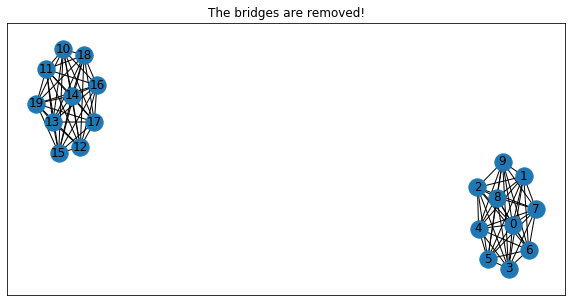

In [27]:
#Remove the bridge in between 9 and 10. The result is as follows.
G.remove_edge(9,10)
plt.figure(figsize=(10,5))
plt.title('The bridges are removed!')
nx.draw_networkx(G)
print(nx.info(G))
print(f'Does the graph has bridges :{nx.has_bridges(G)}')
print(f'The list of bridges in that graph : {list(nx.bridges(G))}')

# Bridge&Centrality Example

In [28]:
three_people = nx.read_edgelist('threepeople.txt',create_using = nx.Graph(),nodetype=int)
print(nx.info(three_people))

if nx.has_bridges(three_people):
    the_bridges = nx.bridges(three_people)
print(f'The bridges: {list(the_bridges)}')

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667
The bridges: [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 15), (3, 2), (2, 11), (2, 12), (2, 13), (2, 14)]


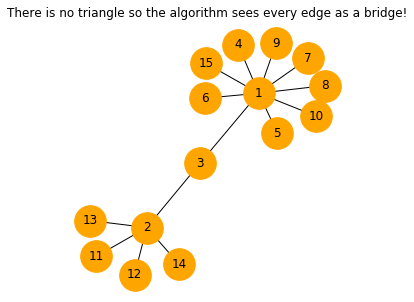

In [29]:
plt.figure(figsize=(5,5))
plt.title('There is no triangle so the algorithm sees every edge as a bridge!')
nx.draw(three_people,node_color='orange',with_labels=True,node_size = 1000)

### Compute the degree centrality for nodes.The degree centrality for a node v is the fraction of nodes it is connected to.

In [30]:
centerData = nx.degree_centrality(three_people)
centerData

{1: 0.6428571428571428,
 3: 0.14285714285714285,
 4: 0.07142857142857142,
 5: 0.07142857142857142,
 6: 0.07142857142857142,
 7: 0.07142857142857142,
 8: 0.07142857142857142,
 9: 0.07142857142857142,
 10: 0.07142857142857142,
 2: 0.3571428571428571,
 11: 0.07142857142857142,
 12: 0.07142857142857142,
 13: 0.07142857142857142,
 14: 0.07142857142857142,
 15: 0.07142857142857142}

In [31]:
three_people.nodes()

NodeView((1, 3, 4, 5, 6, 7, 8, 9, 10, 2, 11, 12, 13, 14, 15))

###### 0,1,9 are selected in the node list above. Because their centerality degree was in the highest top three.

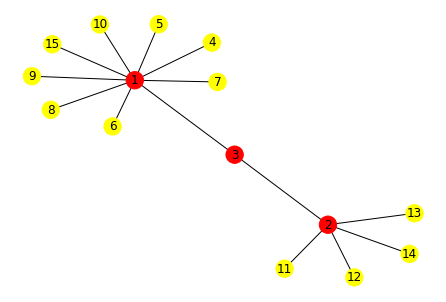

In [32]:
color_map = []
for node in range(len(centerData)):
    if node in [0,1,9]:
        color_map.append('red')
    else:
        color_map.append('yellow')
              
nx.draw(three_people, node_color=color_map, with_labels=True)

##### What happens if I delete the center nodes?

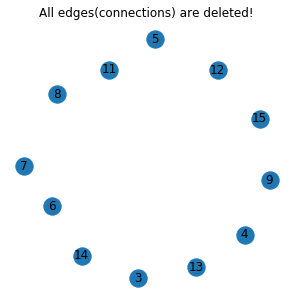

In [33]:
three_people.remove_node(10)
three_people.remove_node(2)
three_people.remove_node(1)
plt.figure(figsize=(5,5))
plt.title('All edges(connections) are deleted!')
nx.draw(three_people, with_labels=True)

# Degree Centrality Example

In [34]:
d=nx.degree_centrality(ng)
print(nx.info(ng))
print(f'Length of d : {len(d)}')
d

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 19
Average degree:   2.1111
Length of d : 18


{2: 0.23529411764705882,
 5: 0.058823529411764705,
 4: 0.1764705882352941,
 1: 0.1764705882352941,
 3: 0.29411764705882354,
 6: 0.058823529411764705,
 23: 0.1764705882352941,
 32: 0.058823529411764705,
 13: 0.058823529411764705,
 24: 0.11764705882352941,
 21: 0.11764705882352941,
 25: 0.058823529411764705,
 43: 0.1764705882352941,
 45: 0.058823529411764705,
 12: 0.058823529411764705,
 34: 0.11764705882352941,
 52: 0.11764705882352941,
 14: 0.11764705882352941}

In [35]:
print(f'Nodes: {list(ng)}')
print(f'The center weight: {max(d.values())}')

Nodes: [2, 5, 4, 1, 3, 6, 23, 32, 13, 24, 21, 25, 43, 45, 12, 34, 52, 14]
The center weight: 0.29411764705882354


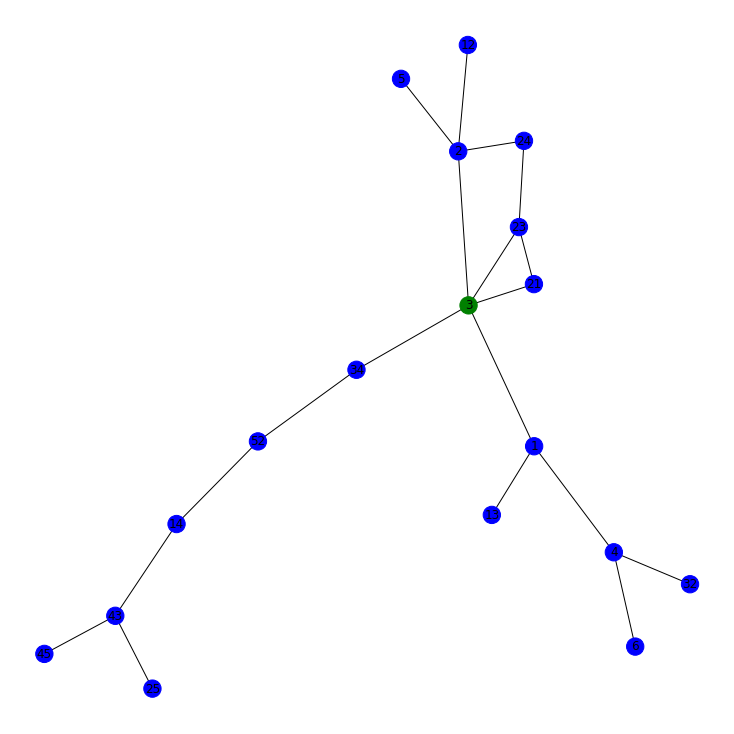

In [36]:

color_map=[]
for key, value in d.items():
    if value == max(d.values()):
        color_map.append('green')
    else:
        color_map.append('blue')
plt.figure(figsize =(10,10))
nx.draw(ng, node_color=color_map, with_labels=True)


##### References

https://blog.dominodatalab.com/social-network-analysis-with-networkx/

https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.remove_nodes_from.html#networkx.Graph.remove_nodes_from

https://stackoverflow.com/questions/25639169/networkx-change-color-width-according-to-edge-attributes-inconsistent-result

https://www.geeksforgeeks.org/network-centrality-measures-in-a-graph-using-networkx-python/?ref=rp

https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/

https://en.wikipedia.org/wiki/Eigenvector_centrality

https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf

https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf

https://networkx.github.io/documentation/stable/tutorial.html

https://www.geeksforgeeks.org/bridge-in-a-graph/

https://www.geeksforgeeks.org/nodes-with-prime-degree-in-an-undirected-graph/?ref=rp

https://en.wikipedia.org/wiki/Centrality#Degree_centrality

https://en.wikipedia.org/wiki/Degree_(graph_theory)